## **Práctica 2**

In [43]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [ ]:
if tf.__version__.startswith("2."):
    import tensorflow.compat.v1 as tf
    tf.compat.v1.disable_v2_behavior()
    tf.compat.v1.disable_eager_execution()

#### Carga de datos

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

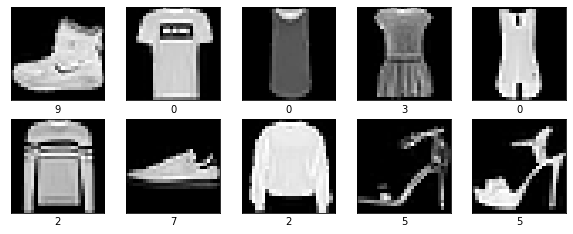

In [6]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

### **PCA (Principal Components Analysis)**

#### Calculando el centro de los datos

In [7]:
X = train_images.reshape(60000,784)
mean_X = X.mean(axis=0)
X_std = (X - mean_X)

#### Aplicación de PCA

In [8]:
cov_mattrix = np.cov(X_std, rowvar = 0)
eigen_values, eigen_vectors = np.linalg.eig(cov_mattrix)

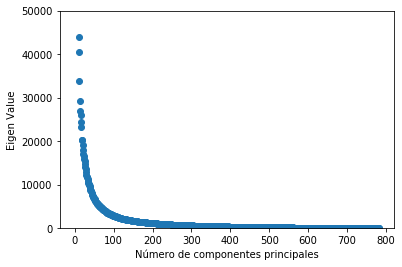

In [9]:
eigen_values_sorted = np.argsort(-eigen_values)
plt.ylabel('Eigen Value')
plt.xlabel('Número de componentes principales')
plt.ylim(0,50000)
plt.scatter(range(eigen_values.shape[0]),eigen_values[eigen_values_sorted])
plt.show()

#### Reducción en dos dimensiones

In [10]:
dim_reduction = eigen_vectors[0:2]
pca = np.dot(X,dim_reduction.T)

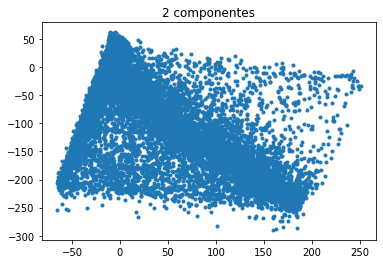

In [11]:
plt.scatter(pca[:, 0], pca[:, 1], marker="."); 
plt.title("2 componentes") 
plt.show()

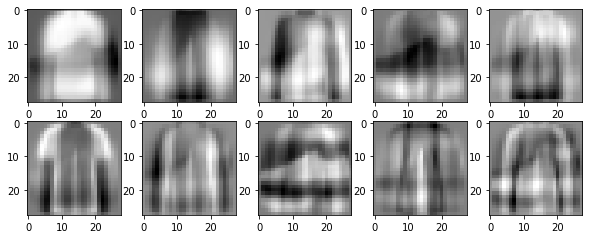

In [12]:
plt.figure(figsize=(10,10))
for i in range(10):
    reshape = eigen_vectors[:,eigen_values_sorted[i]].reshape(28,28)
    plt.subplot(5,5,i+1)
    plt.imshow(reshape.real, cmap = "gray")

#### Varianza preservada

In [13]:
sum(eigen_values[0:2] / sum(eigen_values))

0.46794537899527777

### **T-SNE**

In [25]:
X = test_images.reshape(10000,784)

In [26]:
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(10000, 2)

In [55]:
Y = LabelEncoder().fit_transform(test_labels)
data_frame_tsne = pd.DataFrame({'X':X_embedded[:,0], 'Y':X_embedded[:,1], 'clase':Y})

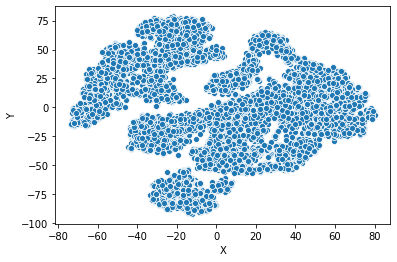

In [60]:
sns.scatterplot(x="X", y="Y", data=data_frame_tsne)

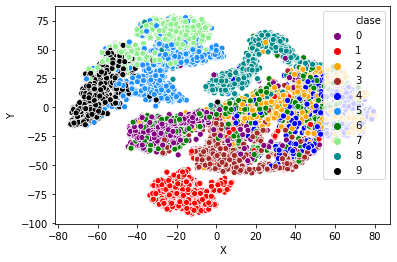

In [63]:
sns.scatterplot(x="X", y="Y",
              hue="clase",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','darkcyan', 'black'],
              legend='full',
              data=data_frame_tsne);

### **Clustering - KMeans**

In [58]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_embedded)
y_kmeans = kmeans.predict(X_embedded)

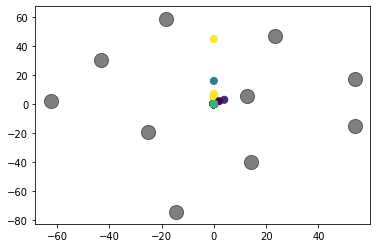

In [59]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);